# Mini Capstone Project -  Bank Marketing Analysis

# Introduction

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

## Source

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Variables in dataset

| |  Variables  | Type    | Details   | 
|---:|:-------------|:-----------|:------|
| 1 | age  | Numeric       | per capita crime rate by town  | 
| 2 | job  | Categorical   | type of job admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") | 
| 3 | marital  | Categorical    | marital status ("divorced","married","single","unknown"; note: "divorced" means divorced or widowed)   |
| 4 | education  | Categorical    | ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")   | 
| 5 | default  | Categorical   | Does the customer have credit in default? ( "no","yes","unknown")   | 
| 6 | balance  | Numeric    | Amount in account   | 
| 7 | housing  | Categorical    | Does the customer have a housing loan? ("no","yes","unknown")   | 
| 8 | loan  | Categorical    | Does the customer have a personal loan? "no","yes","unknown")   | 
| 9 | contact  | Categorical    | contact communication type ("cellular","telephone")   | 
| 10 | month  | Categorical    | last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")   |      
| 11 | day  | Categorical    | last contacted day  of the month   | 
| 12 | duration  | Numeric    | last contact duration, in seconds. Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call ‘y’ is obviously known   |
| 13 | campaign  | Numeric    | Number of contacts performed during this campaign and for this client includes last contact  | 
| 14 | pdays  | Numeric    | Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)   | 
| 15 | previous  | Numeric    | number of contacts performed before this campaign and for this client   | 
| 16 | poutcome  | Numeric    | outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")   |
| 17 | y  | Categorical    | has the client subscribed to a term deposit? ("yes","no")  | 


## Aim

To do exploratory data analysis and visualisation of bank marketing dataset.

Also find out which campaign's performance is better than another.

## Pipeline of Bank Marketing Analysis (EDA)

###  Basic Exploration 
             |
###  Checking missing values 
             |
###  Distribution of Numerical Features
             |
###  Checking Skewness of numerical variables and do transformation 
             |
###  Checking Outliers  
             |
###  Distribution of Categorical variables using pie plot 
             |
###  Categorial vs Numerical variable using barplot
             |
###  Categorical variables vs dependent y variable (categorical)  
             |
###  Campaign 1  visualisation  
             |
###  Campaign 2  visualisation 
             |
###  Campaign_1_success and campaign_2_response 
             |
###  Campaign_1_failure and campaign_2_no_response

### Importing libraries

In [1]:
# for analysis of data importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline
import missingno as msno
from scipy.stats import boxcox, skew
import plotly.express as px

### Basic Exploration

In [2]:
train = pd.read_csv("train.csv",sep=';')   # reading the train dataset using pandas and  use separater

In [3]:
train.shape  # use for getting number of observations(rows) and variables(columns) in train dataset

(45211, 17)

number of observations(rows) in train dataset = 45211

number of variables(columns) in train dataset = 17

In [4]:
test = pd.read_csv("test.csv",sep=';')   # reading the test  dataset using pandas and use separater

In [5]:
test.shape  # use for getting number of observations(rows) and variables(columns) in test  dataset

(4521, 17)

number of observations(rows) in test dataset = 4521

number of variables(columns) in test dataset = 17

In [6]:
bank_mrkting = pd.concat([train,test],ignore_index=True)  # reading the bank_mrkting dataset using pandas  after concate 

In [7]:
bank_mrkting.shape    # use for getting number of observations(rows) and variables(columns) in bank_mrkting dataset

(49732, 17)

number of observations(rows) in train bank_mrkting = 49732

number of variables(columns) in bank_mrkting dataset = 17

In [8]:
bank_mrkting.head()  # reading the 1st 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
bank_mrkting.tail()  # reading the last 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [10]:
bank_mrkting = bank_mrkting.drop_duplicates()   # dropping the dublicates from the bank_mrkting dataset

In [11]:
bank_mrkting.shape   # after dropping dublicates getting number of observations(rows) and variables(columns) in bank_mrkting dataset

(45211, 17)

number of observations(rows) in train bank_mrkting = 45211

number of variables(columns) in bank_mrkting dataset = 17

In [12]:
bank_mrkting.info()  # for getting information of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


 objects variables = 10 , numericals variables = 7

In [13]:
bank_mrkting.nunique()   # getting unique values 

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [14]:
col = ['job','marital','education','default','housing','loan','contact','day','month','poutcome','y']  # columns for conversion 
bank_mrkting[col] = bank_mrkting[col].astype('category')  # converting columns into category because day column given numerical

In [15]:
bank_mrkting.info()   # get detail information of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  category
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(11), int64(6)
memory usage: 2.9 MB


here ,  category = 11 ,  numerical = 6

####  Summary  for  numerical variables

In [16]:
bank_mrkting.describe()      # use for getting summary in the form of mean , standard deviation , min ,max , count

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


Inference : 

            mean  age is 40.93
            
            mean  duration of call is  258 secs
            
            mean  time between 2 campaign is 40 days


####  Summary  for  categorical variables

In [17]:
bank_mrkting.describe(include='category')  # getting summary of categorical variables

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,31,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,20,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,2752,13766,36959,39922


Inference : 

            top job is blue collar
            
            most people are married
            
            most people education is secondary
            
            most people took housing loan
            
            most people communication type cellular
            
            most occuring month is may 
            
            output i.e not deposited most

##  Checking missing values

In [18]:
bank_mrkting.isnull().sum()   # user for getting sum of all missing values for each column

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Inference : 

            No missing values in the dataset

<AxesSubplot:>

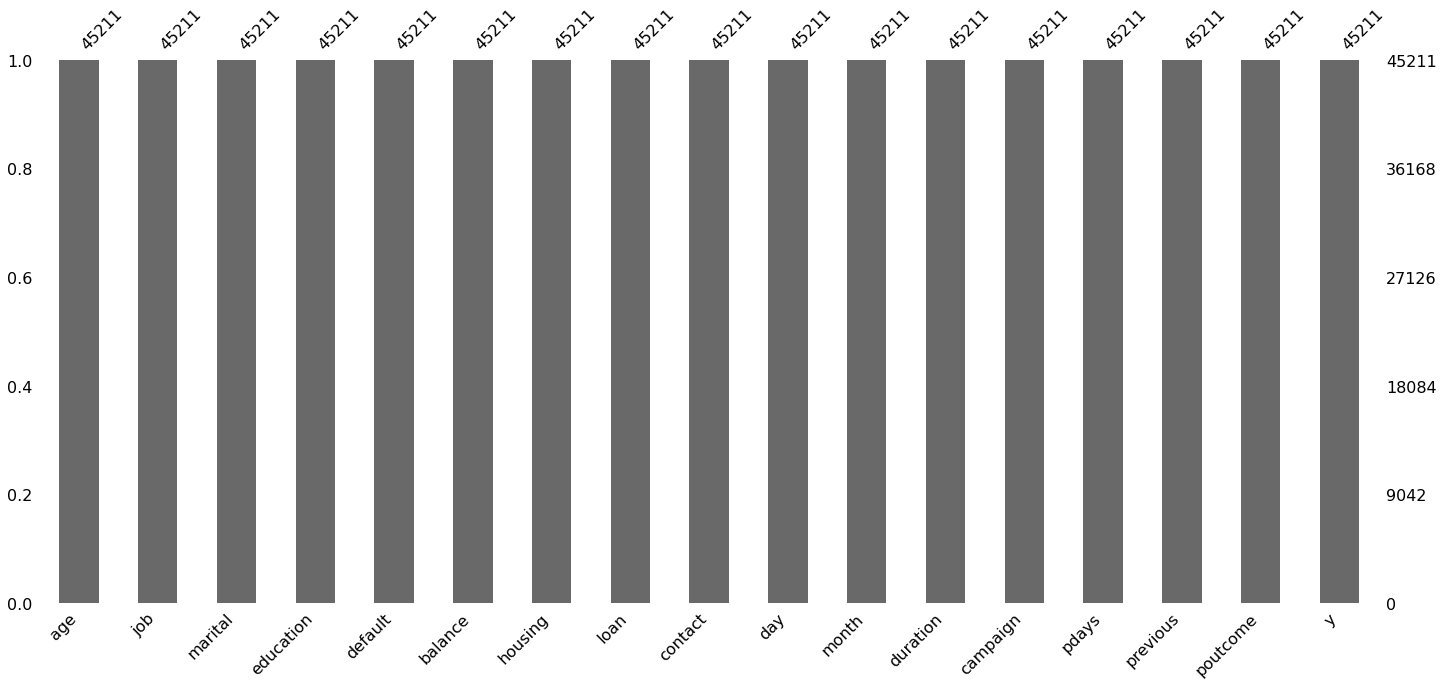

In [19]:
msno.bar(bank_mrkting)    # show missing values in the form of graph

In [20]:
cats = bank_mrkting.select_dtypes('category').columns  #  separating  categorical variables in cats 
nums = bank_mrkting.select_dtypes('number').columns    #  separating  numerical variables in nums

## Distribution of Numerical Features

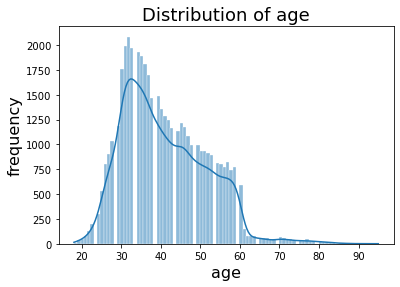

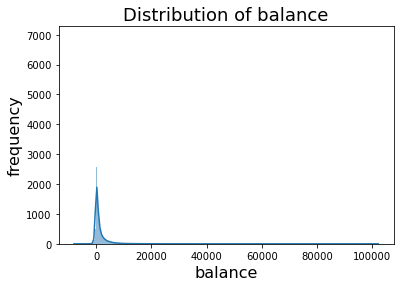

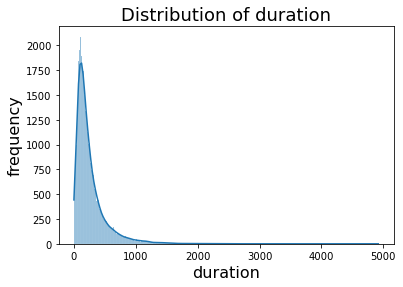

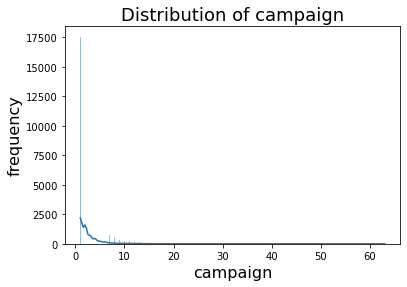

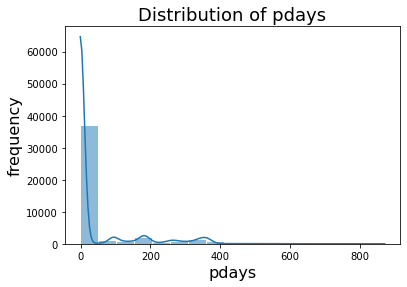

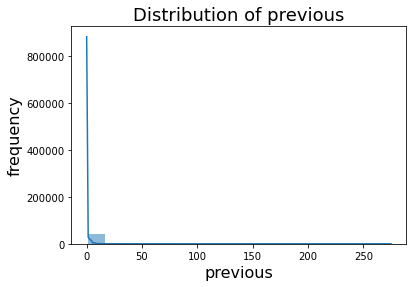

In [21]:
# use for loop for geeting all numerical features  histo plot  at once
for i in nums:
    fig, ax = plt.subplots(1,1)  # size of plots
    sns.histplot(bank_mrkting[i], kde=True, edgecolor="white")  # histograph of each variable
    plt.title('Distribution of %s'%(i), fontsize=18)  # title of each
   
    
    plt.xlabel(i,fontsize=16)  # x axis label
    plt.ylabel('frequency',fontsize=16)   # y axis label  

Inference : 

            all numerical variables are skewed and needed transformation
     

# Checking Skewness of numerical variables and according to that do transformation

####  finding skewness

In [22]:
bank_mrkting.age.skew() # get skewness  for age

0.6848179257252598

In [23]:
bank_mrkting.balance.skew() # get skewness  for balance

8.360308326166326

In [24]:
bank_mrkting.duration.skew() # get skewness for duration

3.144318099423456

In [25]:
bank_mrkting.campaign.skew() # get skewness for campaign 

4.898650166179674

In [26]:
bank_mrkting.pdays.skew() # get skewness  for pdays

2.6157154736563477

In [27]:
bank_mrkting.previous.skew() # get skewness for previous

41.84645447266292

Inference : 

            from above values, all numerical variables mostly are skewed

#### Transformation

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_log', ylabel='Density'>

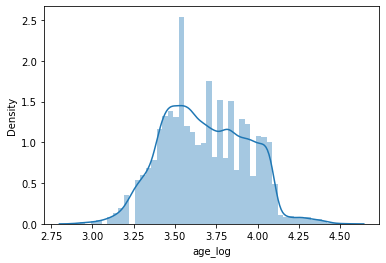

In [28]:
bank_mrkting['age_log'] = np.log(bank_mrkting['age'])   # use log transformation for age
sns.distplot(bank_mrkting['age_log']) # use distribution plot 

In [29]:
bank_mrkting.age_log.skew() # get skewness after transformation

0.0989014480878478

Inference : 

            after doing log transformation age variable becomes normally distributed

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign_log', ylabel='Density'>

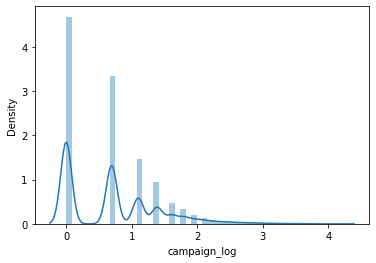

In [30]:
bank_mrkting['campaign_log'] = np.log(bank_mrkting['campaign'])  # use log transformation for campaign
sns.distplot(bank_mrkting['campaign_log'])  # use distribution plot 

In [31]:
bank_mrkting.campaign_log.skew() # get skewness after transformation

0.8802108957712975

Inference : 

            after doing log transformation campaign variable remains skewed

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign_log', ylabel='Density'>

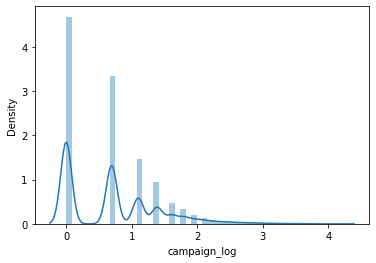

In [32]:
bank_mrkting['campaign_log10'] = np.log10(bank_mrkting['campaign']) # use log10 transformation for campaign 
sns.distplot(bank_mrkting['campaign_log'])  # use distribution plot 

In [33]:
bank_mrkting.campaign_log10.skew() # get skewness after transformation

0.8802108957712964

Inference : 

            after doing log10 transformation campaign variable remains skewed

In [34]:
bank_mrkting['pdays'] = bank_mrkting['pdays'].replace(-1, np.nan)   # replacing -1 with nan so get missing value of skipping

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

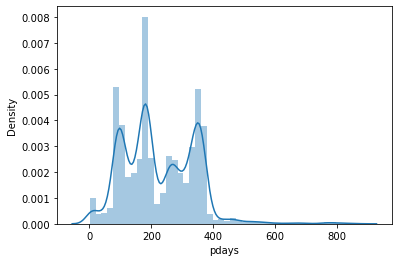

In [35]:
sns.distplot(bank_mrkting['pdays'])  # distribution plot

In [36]:
bank_mrkting.pdays.skew() # get skewness

0.6931397093928041

Inference : 

             pdays variable remains skewed

In [37]:
bank_mrkting['previous'] = bank_mrkting['previous'].replace(0, np.nan) # replacing -1 with nan so get missing value of skipping

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='previous_log', ylabel='Density'>

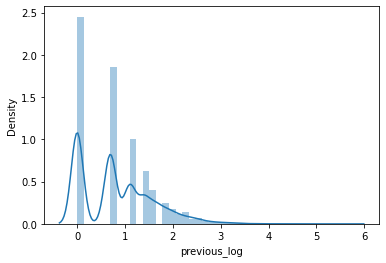

In [38]:
bank_mrkting['previous_log'] = np.log(bank_mrkting['previous'])  # use log transformation for previous
sns.distplot(bank_mrkting['previous_log'])  # distribution plot 


In [39]:
bank_mrkting.previous_log.skew() # get skewness after transformation

0.7004728261157764

Inference :

        after doing log transformation previous variable remains skewed

In [40]:
bank_mrkting.loc[bank_mrkting['balance'] < 1, 'balance'] = 1   # so balance less than 1 take AS 1

In [41]:
to_log = ['balance','duration']     # take these 2 separate columnns in list for log transformation

bank_mrkting_log = bank_mrkting[to_log].applymap(lambda x: np.log(x+1))  # taking log(x+1) transformation using lambda function

# rename columns
bank_mrkting_log.columns = 'log_' + bank_mrkting_log.columns

# concatenation of bank_mrkting and bank_mrkting_log
bank_mrkting = pd.concat([bank_mrkting,bank_mrkting_log],axis=1)


C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_duration', ylabel='Density'>

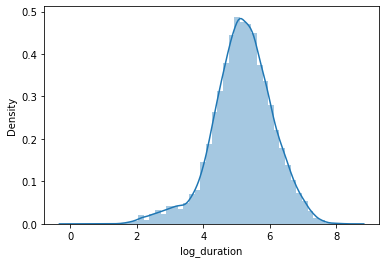

In [42]:
sns.distplot(bank_mrkting['log_duration']) # use log transformation for duration

In [43]:
bank_mrkting.log_duration.skew() # get skewness

-0.45416422447582144

Inference :

        after doing log transformation duration variable becomes normally distributed

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_balance', ylabel='Density'>

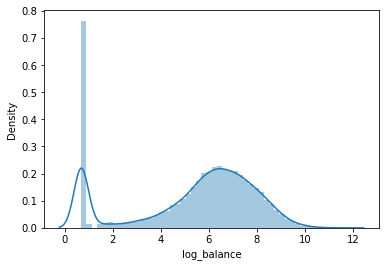

In [44]:
sns.distplot(bank_mrkting['log_balance'])  # use log transformation for balance

In [45]:
bank_mrkting.log_balance.skew() # get skewness

-0.7383010349181575

Inference :

        after doing log transformation balance variable remains skewed

Inference : 

           after  log transformation, most variables are skewed 
            
           only age and duration variables are transformed to normaly distributed
            

## Checking Outliers

#### Outliers before Transformation

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\si

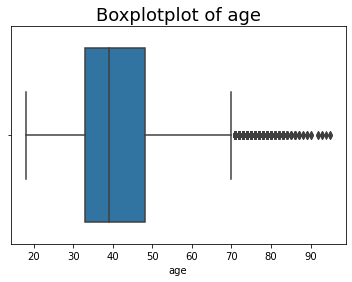

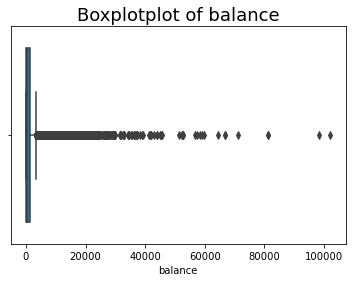

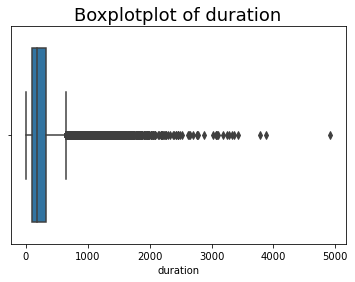

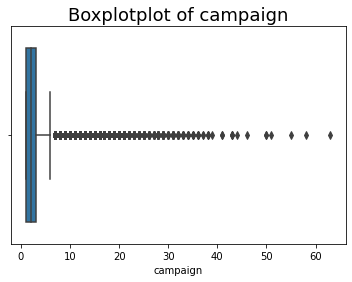

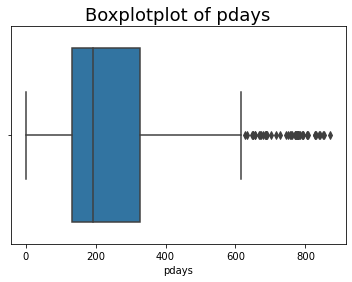

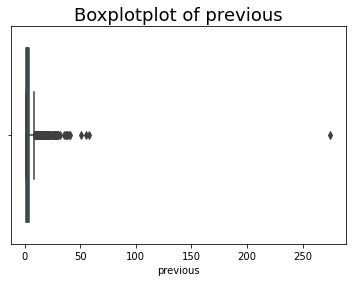

In [46]:
# for loop for getting box plot of all variables at once
for feature in nums:
    fig, ax = plt.subplots(1,1)  # fig size
    sns.boxplot(bank_mrkting[feature])  # box plot for variables
    plt.title('Boxplotplot of %s'%(feature), fontsize=18) # title of plot

Inference : 

           before transformation all variables have ouliers

#### Outliers after Transformation

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of age_log')

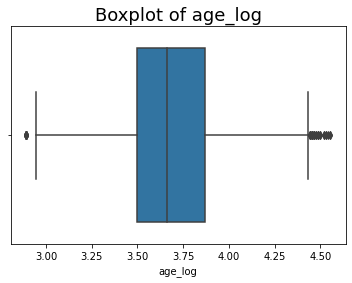

In [47]:
sns.boxplot(bank_mrkting['age_log'])  # box plot of age_log
plt.title('Boxplot of %s'%('age_log'), fontsize=18) # title of plot

Inference :

       after transformation age variable have  some ouliers

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of log_duration')

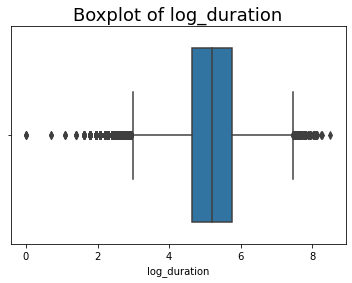

In [48]:
sns.boxplot(bank_mrkting['log_duration'])  # box plot of log_duration
plt.title('Boxplot of %s'%('log_duration'), fontsize=18) # title of plot

Inference :

       after  transformation duration variable have ouliers

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of log_balance')

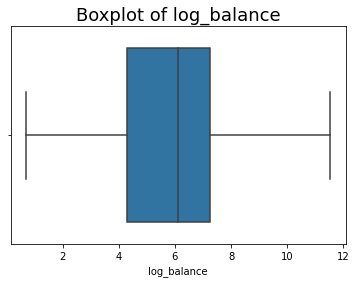

In [49]:

sns.boxplot(bank_mrkting['log_balance'])# box plot of log_balance
plt.title('Boxplot of %s'%('log_balance'), fontsize=18)# title of plot

Inference :

       after  transformation balance variable have no ouliers

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of campaign_log')

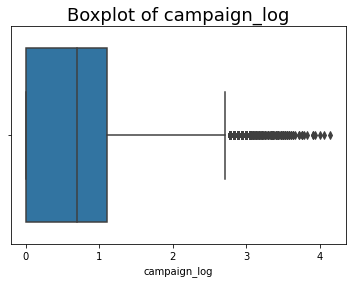

In [50]:
sns.boxplot(bank_mrkting['campaign_log'])# box plot of campaign_log
plt.title('Boxplot of %s'%('campaign_log'), fontsize=18) # # title of plot

Inference :

       after  transformation campaign variable have ouliers

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of pdays')

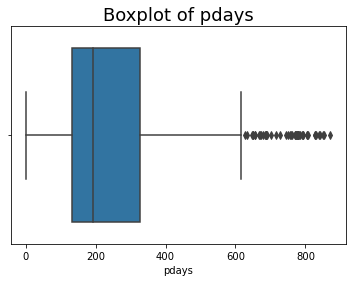

In [51]:
sns.boxplot(bank_mrkting['pdays'])  # box plot of padys
plt.title('Boxplot of %s'%('pdays'), fontsize=18)# title of plot

Inference :

        pdays variable have ouliers

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of previous_log')

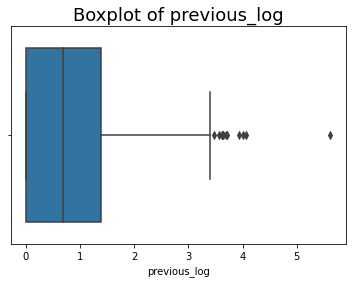

In [52]:
sns.boxplot(bank_mrkting['previous_log']) # box plot of previous_log
plt.title('Boxplot of %s'%('previous_log'), fontsize=18) # # title of plot

Inference :

       after  transformation previous variable have ouliers
       
       after  transformation maximum variables have outliers

## Distribution of Categorical variables using pie plot

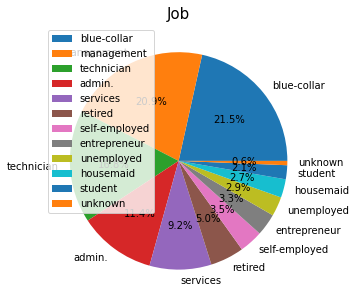

In [55]:
labels = bank_mrkting['job'].value_counts().index
# colors = ['grey','blue','red','yellow','green','brown']
sizes = bank_mrkting['job'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Job',fontsize = 15)
plt.legend()

Inference :

   jobs of bluecollar and mangement are top jobs

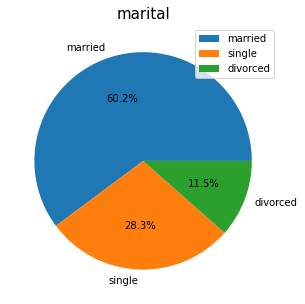

In [56]:
labels = bank_mrkting['marital'].value_counts().index
sizes = bank_mrkting['marital'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('marital',fontsize = 15)
plt.legend()

Inference :
        from above pie plot married percentage is higher.

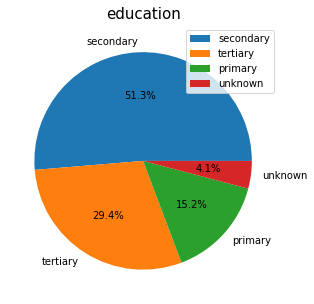

In [57]:
labels = bank_mrkting['education'].value_counts().index
sizes = bank_mrkting['education'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('education',fontsize = 15)
plt.legend()

Inference :

        from above pie plot secondary and tertiary education is higher

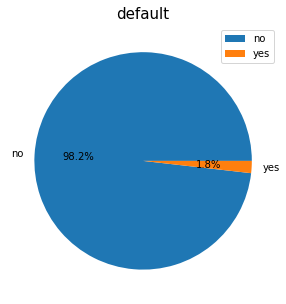

In [58]:
labels = bank_mrkting['default'].value_counts().index
sizes = bank_mrkting['default'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('default',fontsize = 15)
plt.legend()

Inference :

        from above pie plot  98.2% have no credit default

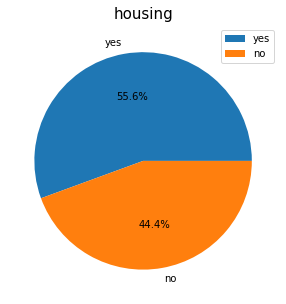

In [59]:
labels = bank_mrkting['housing'].value_counts().index
sizes = bank_mrkting['housing'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('housing',fontsize = 15)
plt.legend()

Inference :

        From above pie plot housing loan yes for 55.6 % customers

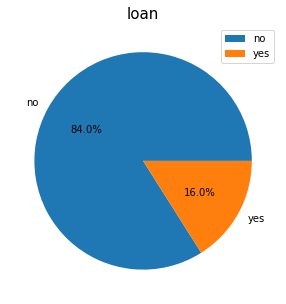

In [60]:
labels = bank_mrkting['loan'].value_counts().index
sizes = bank_mrkting['loan'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('loan',fontsize = 15)
plt.legend()

Inference :

        From above pie plot personal loan no for 84 % customers

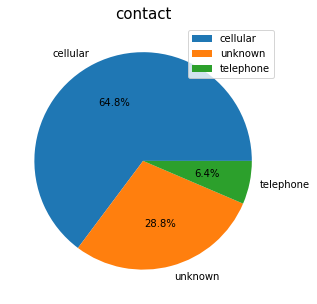

In [61]:
labels = bank_mrkting['contact'].value_counts().index
sizes = bank_mrkting['contact'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('contact',fontsize = 15)
plt.legend()

Inference :

        From above pie plot most of the contacts cellular

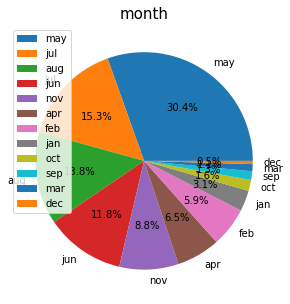

In [62]:
labels = bank_mrkting['month'].value_counts().index
sizes = bank_mrkting['month'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('month',fontsize = 15)
plt.legend()

Inference :

        From above pie plot , may and july have higher values

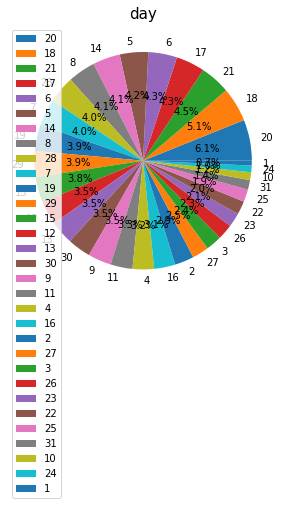

In [63]:
labels = bank_mrkting['day'].value_counts().index
sizes = bank_mrkting['day'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('day',fontsize = 15)
plt.legend()

Inference :

        From above pie plot days of 20th 18th and 21th have large 

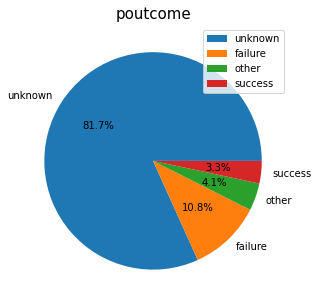

In [64]:
labels = bank_mrkting['poutcome'].value_counts().index
sizes = bank_mrkting['poutcome'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('poutcome',fontsize = 15)
plt.legend()

Inference :

        From above pie plot , for poutcome , unknown values are more

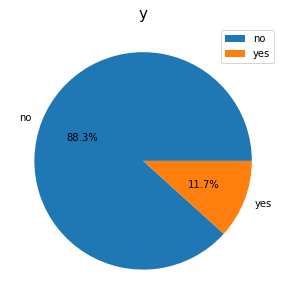

In [65]:
labels = bank_mrkting['y'].value_counts().index
sizes = bank_mrkting['y'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('y',fontsize = 15)
plt.legend()

Inference :

        From above pie plot maximum no client subscribed term deposit  i.e. no values large

Please show how the categorical variables are related to each other and also their distribution among the numerical variables

## Categorial  vs Numerical  variable using barplot

#### Categorical variables  vs age variable

Text(0.5, 1.0, 'Barplot of job vs age')

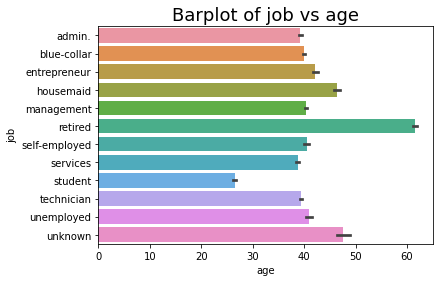

In [66]:
sns.barplot(x='age',y='job',data=bank_mrkting)  # bar plot for job and age
plt.title('Barplot of %s'%('job vs age'), fontsize=18)#  plot title 

Inference :

        from above table , different jobs of people and their age values according to that job

Text(0.5, 1.0, 'Barplot of marital vs age')

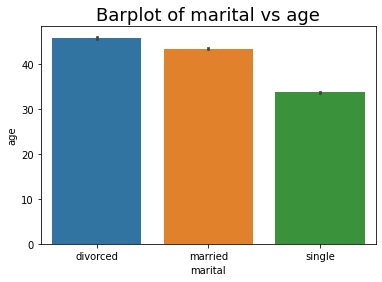

In [67]:
sns.barplot(x='marital',y='age',data=bank_mrkting)  # bar plot  for marital and age
plt.title('Barplot of %s'%('marital vs age'), fontsize=18) #  plot title 

Inference :

        here, divorsed people age larger ,  decreasing order  divorced > married > single

Text(0.5, 1.0, 'Barplot of education vs age')

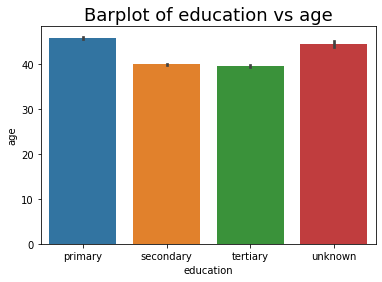

In [68]:
sns.barplot(x='education',y='age',data=bank_mrkting)  # bar plot education vs age
plt.title('Barplot of %s'%('education vs age'), fontsize=18)  #  plot title 

Inference :

        here, from above plot  customer with primary education have higher age

Text(0.5, 1.0, 'Barplot of default vs age')

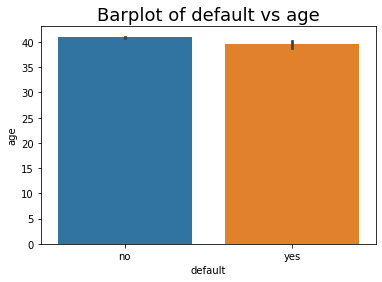

In [69]:
sns.barplot(x='default',y='age',data=bank_mrkting)  # bar plot default vs age
plt.title('Barplot of %s'%('default vs age'), fontsize=18) #  plot title 

Inference :

        customers have no default credit have larger age

Text(0.5, 1.0, 'Barplot of housing vs age')

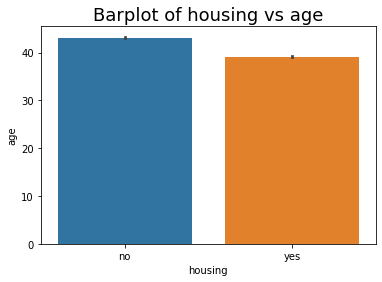

In [70]:
sns.barplot(x='housing',y='age',data=bank_mrkting)# bar plot housing vs age
plt.title('Barplot of %s'%('housing vs age'), fontsize=18)#  plot title 

Inference :

        customers have no housing loan have large age

Text(0.5, 1.0, 'Barplot of loan vs age')

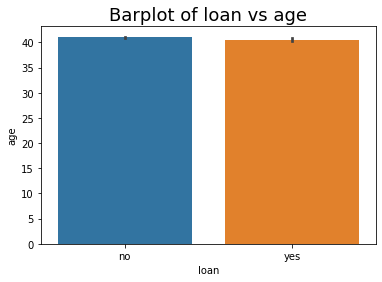

In [71]:
sns.barplot(x='loan',y='age',data=bank_mrkting) # bar plot loan vs age
plt.title('Barplot of %s'%('loan vs age'), fontsize=18)#  plot title 

Inference :

        customers having no personal loan is slitly greater age than having loan

#### Categorical variables  vs balance variable

Text(0.5, 1.0, 'Barplot of job vs balance')

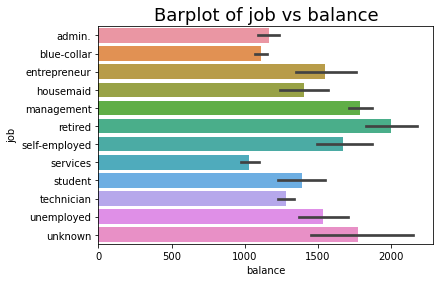

In [72]:
sns.barplot(x='balance',y='job',data=bank_mrkting) # bar plot job vs balance
plt.title('Barplot of %s'%('job vs balance'), fontsize=18)#  plot title 

Inference :

        retired , management , self employed  have high balance where as retired and blue collar has low balance

Text(0.5, 1.0, 'Barplot of marital vs balance')

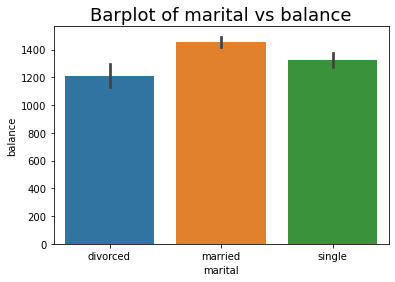

In [73]:
sns.barplot(x='marital',y='balance',data=bank_mrkting) # bar plot  marutal vs balance
plt.title('Barplot of %s'%('marital vs balance'), fontsize=18)#  plot title 

Inference :

        married people have higher balance

Text(0.5, 1.0, 'Barplot of education vs balance')

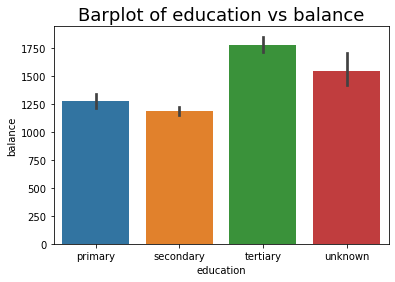

In [74]:
sns.barplot(x='education',y='balance',data=bank_mrkting)# bar plot education vs balance
plt.title('Barplot of %s'%('education vs balance'), fontsize=18)#  plot title 

Inference :

        people having tertiary education have larger balnce than other two

Text(0.5, 1.0, 'Barplot of default vs balance')

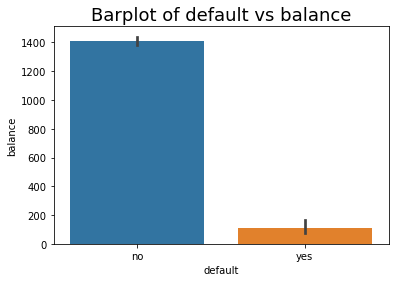

In [75]:
sns.barplot(x='default',y='balance',data=bank_mrkting) # bar plot default vs balance 
plt.title('Barplot of %s'%('default vs balance'), fontsize=18)#  plot title 

Inference :

        people with no  default credit have higher balnce 

Text(0.5, 1.0, 'Barplot of housing vs balance')

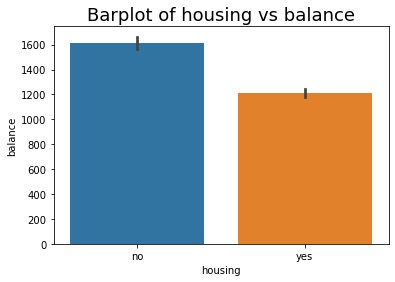

In [76]:
sns.barplot(x='housing',y='balance',data=bank_mrkting) # bar plot housing vs balance 
plt.title('Barplot of %s'%('housing vs balance'), fontsize=18)#  plot title 

Inference :

        people with no housing loan have higher balance

Text(0.5, 1.0, 'Barplot of loan vs balance')

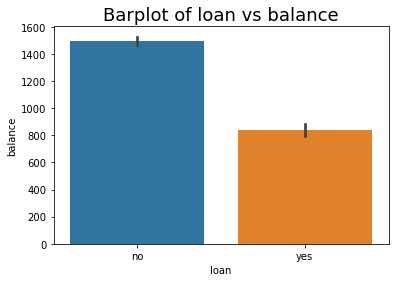

In [77]:
sns.barplot(x='loan',y='balance',data=bank_mrkting) # bar plot loan vs balance
plt.title('Barplot of %s'%('loan vs balance'), fontsize=18)#  plot title 

Inference :

        people having no personal loan have higher balance

## categorical variables vs dependent y variable (categorical)

Text(0.5, 1.0, 'countplot of job and y')

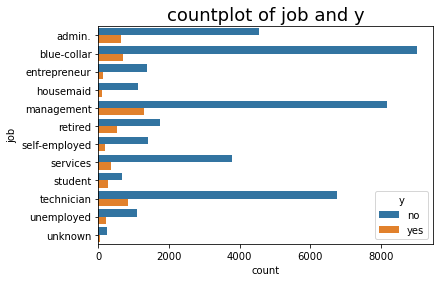

In [78]:
sns.countplot(y='job',hue='y',data =bank_mrkting ) # # countplot job and y
plt.title('countplot of %s'%('job and y'), fontsize=18)#  plot title 

Inference :
           
           yes column
           
        management , blue collar and technician job people have subscribed term deposited in large amount

Text(0.5, 1.0, 'countplot of marital and y')

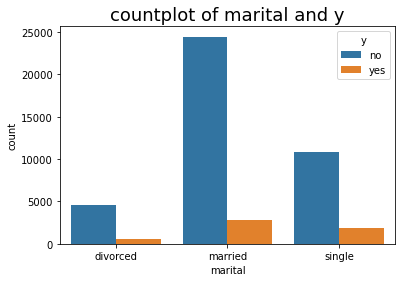

In [79]:
sns.countplot(x='marital',hue='y',data =bank_mrkting ) # countplot marital and y
plt.title('countplot of %s'%('marital and y'), fontsize=18)#  plot title 

Inference :
          
        yes column

        married people have subscribed term deposit in higher than others

Text(0.5, 1.0, 'countplot of education and y')

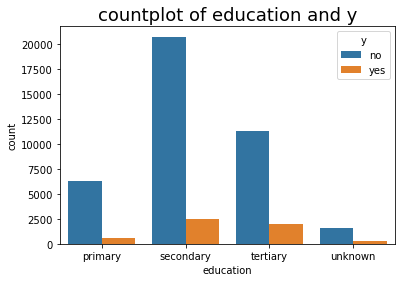

In [80]:
sns.countplot(x='education',hue='y',data =bank_mrkting ) # countplot of education and y
plt.title('countplot of %s'%('education and y'), fontsize=18)#  plot title 

Inference :

        yes column people with secondary education have subscribed term deposit in large amount

Text(0.5, 1.0, 'countplot of default and y')

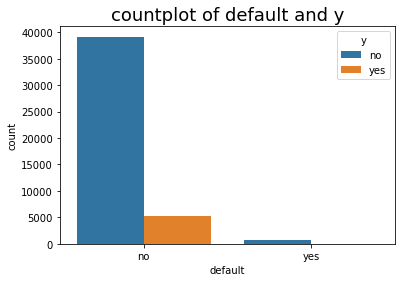

In [81]:
sns.countplot(x='default',hue='y',data =bank_mrkting ) # countplot of default and y
plt.title('countplot of %s'%('default and y'), fontsize=18)#  plot title 

Inference :

        people having default credit have not subscribed to any term deposit

Text(0.5, 1.0, 'countplot of housing and y')

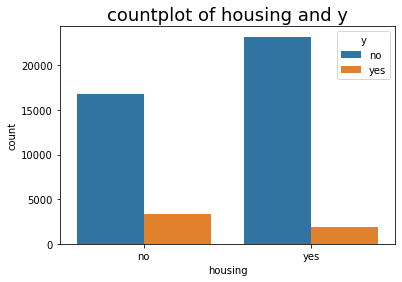

In [82]:
sns.countplot(x='housing',hue='y',data =bank_mrkting ) # countplot of housing and y
plt.title('countplot of %s'%('housing and y'), fontsize=18) #  plot title 

Inference:
    
    people having  no housig loan have subscribed term deposit more amount

Text(0.5, 1.0, 'countplot of loan and y')

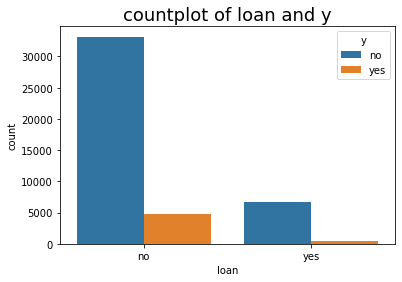

In [83]:
sns.countplot(x='loan',hue='y',data =bank_mrkting ) # countplot of loan and y
plt.title('countplot of %s'%('loan and y'), fontsize=18)#  plot title 

Inference:

        people having no personal loan have subscribed to term deposit in large number

Text(0.5, 1.0, 'countplot of contact and y')

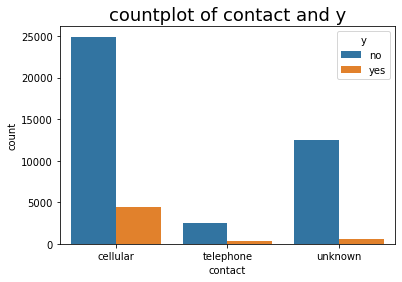

In [84]:
sns.countplot(x='contact',hue='y',data =bank_mrkting ) # counplot of contact and y
plt.title('countplot of %s'%('contact and y'), fontsize=18)#  plot title 

inference :
    
    large people are contacted by cellular communication

Text(0.5, 1.0, 'countplot of month and y')

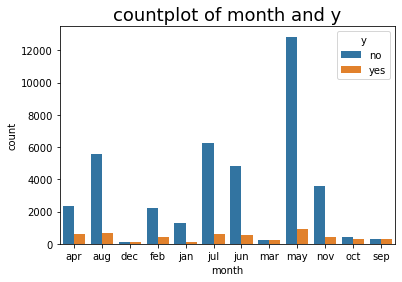

In [85]:
sns.countplot(x='month',hue='y',data =bank_mrkting ) # countplot of month and y
plt.title('countplot of %s'%('month and y'), fontsize=18)#  plot title 

Inference:
    
    In may month , people with large number have subscribed to term deposit(yes column)

Text(0.5, 1.0, 'countplot of day and y')

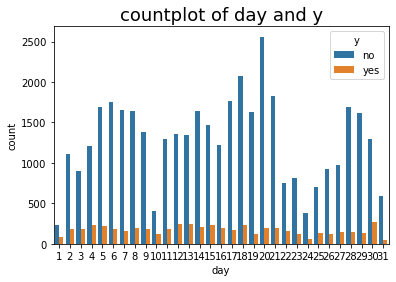

In [86]:
sns.countplot(x='day',hue='y',data =bank_mrkting ) # countplot of day and y
plt.title('countplot of %s'%('day and y'), fontsize=18)#  plot title 

Inference:
    
    at 30,18, 12,13 days have more people subscribed to term deposit

Text(0.5, 1.0, 'countplot of poutcome and y')

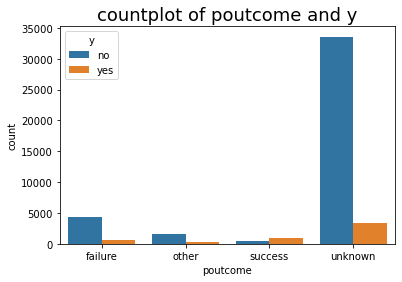

In [87]:
sns.countplot(x='poutcome',hue='y',data =bank_mrkting ) # countplot of poutcome and y
plt.title('countplot of %s'%('poutcome and y'), fontsize=18)#  plot title 

Inference:

       unknown people for poutcome have subscribe term deposit in large amount

Try and find out which campaign was effective for which type/group of people and see if they have anything common among them

In poutcome variable , there is 'unknown' values which are missing values for campaign 1 and these are values  for campaign 2
so that divide these campaign based on these 'unknown' values

In [88]:
campaign_1 = bank_mrkting[bank_mrkting.poutcome != 'unknown'] # 'unknown' not for campaign 1 so not add in campaign_1
campaign_2 = bank_mrkting[bank_mrkting.poutcome == 'unknown'] # 'unknown'  for campaign 2 so  add in campaign_2

## Campaign 1  visualisation

#### categorical variables vs poutcome  for campaign 1

Text(0.5, 1.0, 'countplot of job and poutcome')

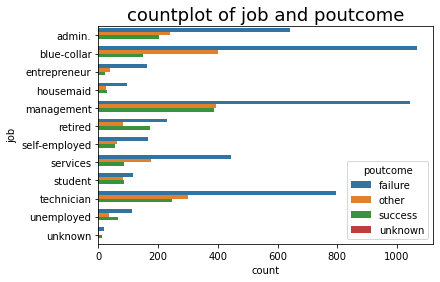

In [89]:
sns.countplot(y='job',hue='poutcome',data =campaign_1) # countplot of job and poutcome
plt.title('countplot of %s'%('job and poutcome'), fontsize=18) # plot  title

inference:

      for campaign 1 , management and technician have higher success 
                         
                       blue-collar large failure
      

Text(0.5, 1.0, 'countplot of marital and poutcome')

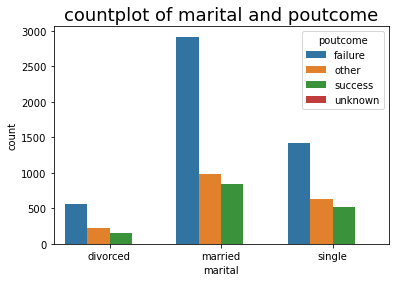

In [90]:
sns.countplot(x='marital',hue='poutcome',data =campaign_1) # countplot of marital and poutcome 
plt.title('countplot of %s'%('marital and poutcome'), fontsize=18) # plot title

inference:

      for campaign 1 , married  have higher success 
                         
                       married also  large failure

Text(0.5, 1.0, 'countplot of education and poutcome')

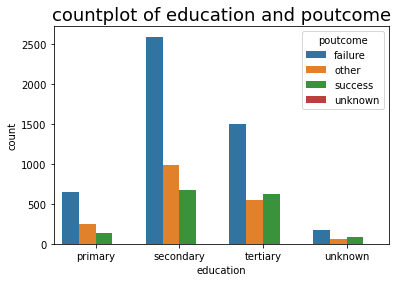

In [91]:
sns.countplot(x='education',hue='poutcome',data =campaign_1) # countplot for education and poutcome
plt.title('countplot of %s'%('education and poutcome'), fontsize=18) # # plot  title

inference:

      for campaign 1 , secondary education  have higher success 
                         
                       secondary education also  large failure as compare to others

Text(0.5, 1.0, 'countplot of default and poutcome')

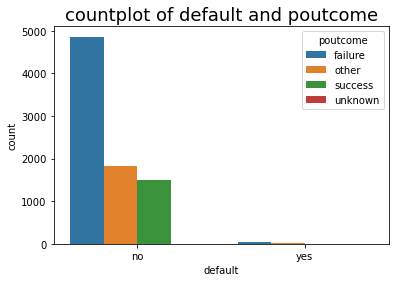

In [92]:
sns.countplot(x='default',hue='poutcome',data =campaign_1)# countplot for default and poutcome
plt.title('countplot of %s'%('default and poutcome'), fontsize=18) # plot title

inference:

      for campaign 1 , people having no default credit have success , people having  default credit have no sucess 
                         
                       people having no default credit also  large failure

Text(0.5, 1.0, 'countplot of housing and poutcome')

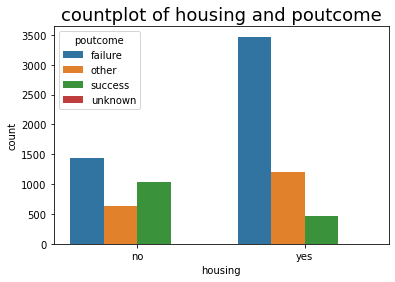

In [93]:
sns.countplot(x='housing',hue='poutcome',data =campaign_1) # countplot for housing and poutcome
plt.title('countplot of %s'%('housing and poutcome'), fontsize=18) # plot title

inference:

      for campaign 1 , people having no housing loan have success more , people having  housing loan have large failure
                

Text(0.5, 1.0, 'countplot of loan and poutcome')

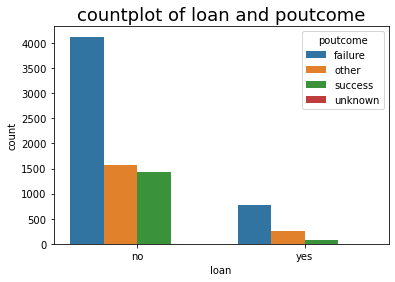

In [94]:
sns.countplot(x='loan',hue='poutcome',data =campaign_1) # countplot of loan and poutcome
plt.title('countplot of %s'%('loan and poutcome'), fontsize=18)# plot title

inference:

      for campaign 1 , people having no personal loan have success more 
                         
                       people having no personal loan  also  large failure

#### numeriacal variables vs poutcome for campaign1

Text(0.5, 1.0, 'Boxplot of poutcome vs age')

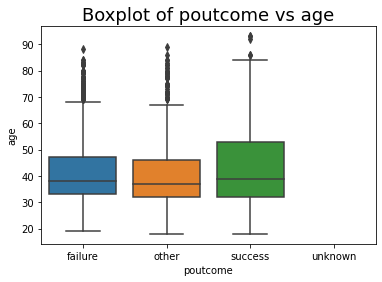

In [95]:
sns.boxplot(x='poutcome',y='age',data=campaign_1) # box plot poutcome vs age for campaign 1
plt.title('Boxplot of %s'%('poutcome vs age'), fontsize=18) # plot title

inference:

      for campaign 1 , success for this campaign large age than others
                    

Text(0.5, 1.0, 'Boxplot of poutcome vs balance')

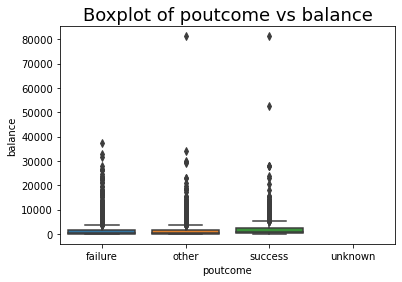

In [96]:
sns.boxplot(x='poutcome',y='balance',data=campaign_1)# box plot poutcome vs balance for campaign 1
plt.title('Boxplot of %s'%('poutcome vs balance'), fontsize=18) # plot title 

inference:

      for campaign 1 , success for this campaign  have large balance
                        

Text(0.5, 1.0, 'Boxplot of poutcome vs duration')

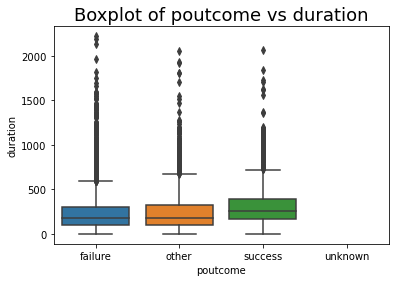

In [97]:
sns.boxplot(x='poutcome',y='duration',data=campaign_1)# # box plot poutcome vs duration duration for campaign 1
plt.title('Boxplot of %s'%('poutcome vs duration'), fontsize=18) # plot title

inference:

      for campaign 1 , success for this campaign  have large duration 

Text(0.5, 1.0, 'Boxplot of poutcome vs campaign')

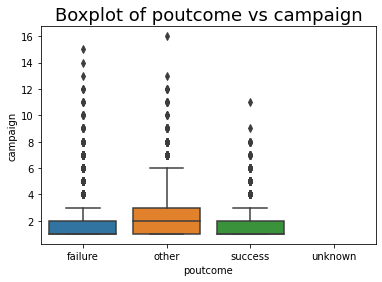

In [98]:
sns.boxplot(x='poutcome',y='campaign',data=campaign_1) # box plot poutcome vs campaign for campaign 1
plt.title('Boxplot of %s'%('poutcome vs campaign'), fontsize=18)# plot title

inference:

      for campaign 1 , success and failure  for campaign column  have same values

Text(0.5, 1.0, 'Boxplot of poutcome vs pdays')

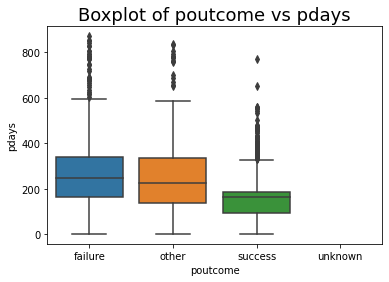

In [99]:
sns.boxplot(x='poutcome',y='pdays',data=campaign_1)# box plot poutcome vs pdays for campaign 1
plt.title('Boxplot of %s'%('poutcome vs pdays'), fontsize=18) # plot title

inference:

      for campaign 1 , success for this campaign  have small pdays 

Text(0.5, 1.0, 'Boxplot of poutcome vs previous')

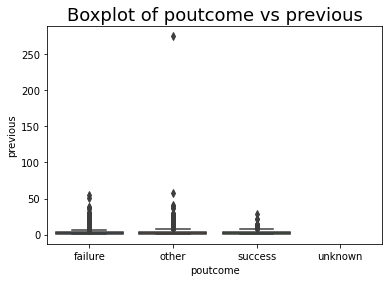

In [100]:
sns.boxplot(x='poutcome',y='previous',data=campaign_1) # box plot poutcome vs previous for campaign 1
plt.title('Boxplot of %s'%('poutcome vs previous'), fontsize=18) # plot title

inference:

      for campaign 1 , sees all same

## Campaign 2  visualisation

#### categorical variables vs  y (dependent variable ) (categorical) for campaign 2

Text(0.5, 1.0, 'countplot of job and y')

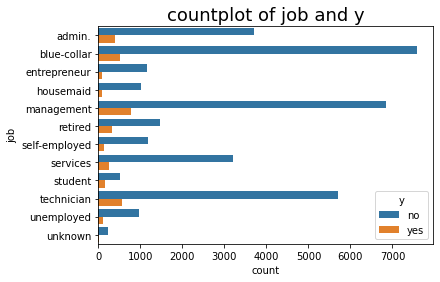

In [101]:
sns.countplot(y='job',hue='y',data =campaign_2) # count plot job and y for campaign 2
plt.title('countplot of %s'%('job and y'), fontsize=18) # plot title

inference:

      for campaign 2 , management , technician jobs  have subscribed more term deposit(yes column)

Text(0.5, 1.0, 'countplot of marital and y')

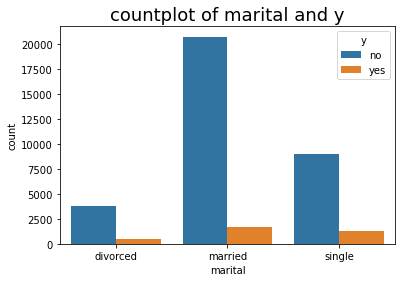

In [102]:
sns.countplot(x='marital',hue='y',data =campaign_2)# count plot marital and y for campaign 2
plt.title('countplot of %s'%('marital and y'), fontsize=18)# plt title

inference:

      for campaign 2 , married   have subscribed more term deposit(yes column)
      
                       also married   have no  subscribed term deposit values larger(no column)

Text(0.5, 1.0, 'countplot of education and y')

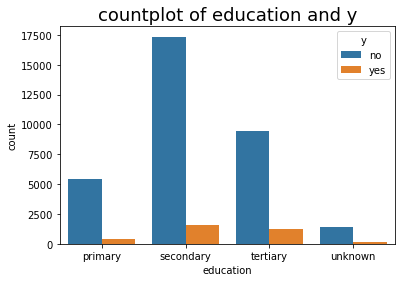

In [103]:
sns.countplot(x='education',hue='y',data =campaign_2)# count plot education and y for campaign 2
plt.title('countplot of %s'%('education and y'), fontsize=18) # plot title

inference:

      for campaign 2 , secondary education  have subscribed more term deposit(yes column)
      
                       also secondary education  have no  subscribed term deposit values larger(no column)

Text(0.5, 1.0, 'countplot of default and y')

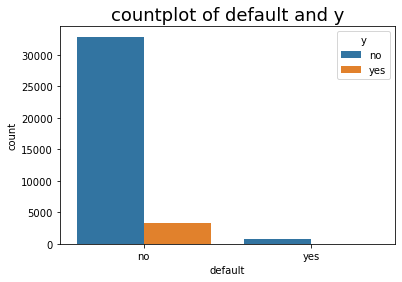

In [104]:
sns.countplot(x='default',hue='y',data =campaign_2) # count plot default and y for campaign 2
plt.title('countplot of %s'%('default and y'), fontsize=18)# plot title

inference:

      for campaign 2 , no default credit  have subscribed more term deposit( no column)
      
                       also no default credit   have no  subscribed term deposit values larger(no column)

Text(0.5, 1.0, 'countplot of housing and y')

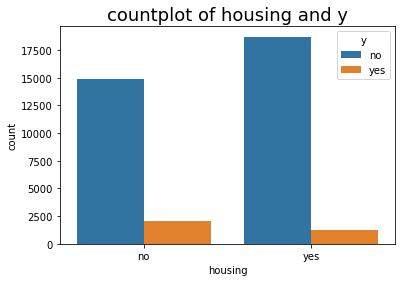

In [105]:
sns.countplot(x='housing',hue='y',data =campaign_2)  # count plot housing and y for campaign 2
plt.title('countplot of %s'%('housing and y'), fontsize=18) #  plot title

inference:

      for campaign 2 , no housing loan  have subscribed more term deposit( no column)
      
               people have housing loan   having no  subscribed term deposit values larger(no column)

Text(0.5, 1.0, 'countplot of loan and y')

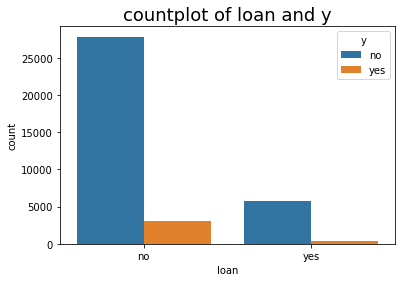

In [106]:
sns.countplot(x='loan',hue='y',data =campaign_2)# count plot loan and y for campaign 2
plt.title('countplot of %s'%('loan and y'), fontsize=18)# plot title

inference:

      for campaign 2 , no personal loan  have subscribed more term deposit
      
               people have no personal loan  also  having no  subscribed term deposit values larger

Text(0.5, 1.0, 'countplot of contact and y')

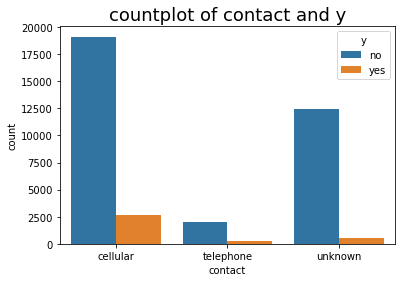

In [107]:
sns.countplot(x='contact',hue='y',data =campaign_2) # count plot contact  and y for campaign 2
plt.title('countplot of %s'%('contact and y'), fontsize=18) # plot title

inference:

      for campaign 2 , cellular communication  have subscribed more term deposit( yes column)
      
               people have cellular communication also having no subscribed term deposit values larger(no column)

Text(0.5, 1.0, 'countplot of month and y')

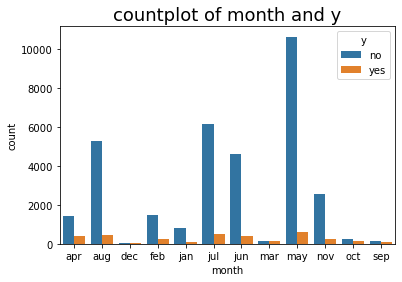

In [108]:
sns.countplot(x='month',hue='y',data =campaign_2) # count plot month and y for campaign 2
plt.title('countplot of %s'%('month and y'), fontsize=18) # plot title

inference:

  for campaign 2 , may and july month  have subscribed more term deposit( yes column)

           may and july month also having no subscribed term deposit values larger(no column)

Text(0.5, 1.0, 'countplot of day and y')

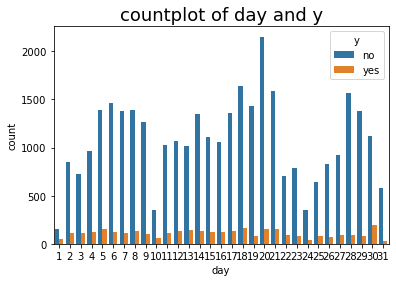

In [109]:
sns.countplot(x='day',hue='y',data =campaign_2)# count plot day and y for campaign 2
plt.title('countplot of %s'%('day and y'), fontsize=18)# plot title

inference:

  for campaign 2 ,  30,18,20,21 days  have subscribed more term deposit( yes column)

            20,18,21 days having no subscribed term deposit values larger(no column)

####  numerical variables vs  y (dependent variable) (categorical)

Text(0.5, 1.0, 'Boxplot of y vs age')

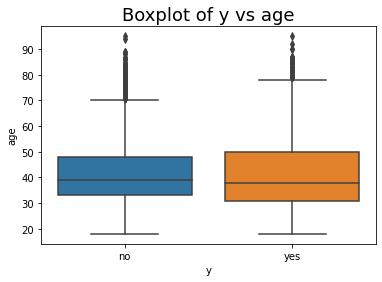

In [110]:
sns.boxplot(x='y',y='age',data=campaign_2)  # box plot age vs y for campaign 2
plt.title('Boxplot of %s'%('y vs age'), fontsize=18)# plot title

 inference:

for campaign 2 , people have subscribed more term deposit  having more age than other


Text(0.5, 1.0, 'Boxplot of y vs balance')

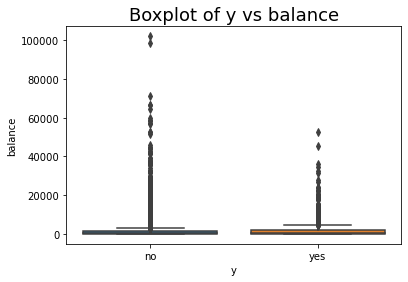

In [111]:
sns.boxplot(x='y',y='balance',data=campaign_2)# box plot balance vs y for campaign 2
plt.title('Boxplot of %s'%('y vs balance'), fontsize=18)# plot title

inference:

for campaign 2 , nearly same balance have subscribed  term deposit and no subscribed term deposit


Text(0.5, 1.0, 'Boxplot of y vs duration')

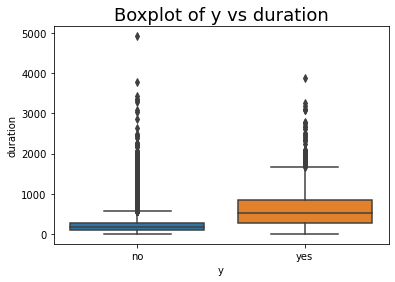

In [112]:
sns.boxplot(x='y',y='duration',data=campaign_2) # box plot duration vs y for campaign 2
plt.title('Boxplot of %s'%('y vs duration'), fontsize=18)# plot title

inference:

for campaign 2 , duration larger have subscribed term deposit 

Text(0.5, 1.0, 'Boxplot of y vs campaign')

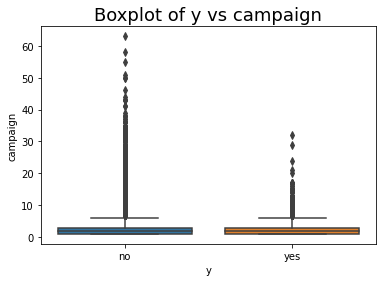

In [113]:
sns.boxplot(x='y',y='campaign',data=campaign_2)# box plot campaign vs y for campaign 2
plt.title('Boxplot of %s'%('y vs campaign'), fontsize=18)# plot title

Text(0.5, 1.0, 'Boxplot of y vs pdays')

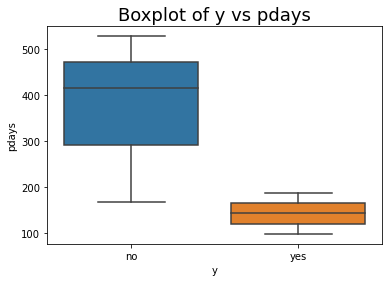

In [114]:
sns.boxplot(x='y',y='pdays',data=campaign_2)# box plot pdays vs y for campaign 2
plt.title('Boxplot of %s'%('y vs pdays'), fontsize=18)# plot title

inference:

for campaign 2 , less pdays have subscribed term deposit 

Text(0.5, 1.0, 'Boxplot of y vs previous')

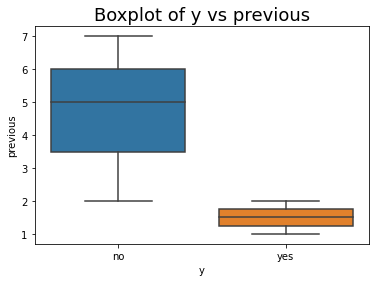

In [115]:
sns.boxplot(x='y',y='previous',data=campaign_2)# box plot previous vs y for campaign 2
plt.title('Boxplot of %s'%('y vs previous'), fontsize=18)# plot title

inference:

for campaign 2 ,less previous  have subscribed term deposit 

Try and find out which campaign was effective for which type/group of people and see if they have anything common among them


### Effective campaign

In [116]:
campaign_1_performance_rate = (campaign_1.poutcome=='success').sum()/len(campaign_1)*100   # find percent preformance rate campaign1 
campaign_2_performance_rate = (campaign_2.y=='yes').sum()/len(campaign_2)*100# find percent preformance rate campaign 2
campaign_1_performance_rate  # 

18.310712554532234

In [117]:
campaign_2_performance_rate

9.161503287426607

inference:

campaign 1 performance rate is better than campaign 2

### campaign_1_success and campaign_2_response

In [118]:
campaign_1_success = campaign_1[campaign_1.poutcome =='success']
campaign_2_response = campaign_2[campaign_2.y=='yes']

#### campaign_1_success pie plots

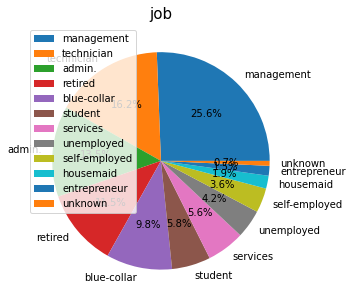

In [119]:
labels = campaign_1_success['job'].value_counts().index
sizes = campaign_1_success['job'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('job',fontsize = 15)
plt.legend()

inference:

for campaign 1 success, management , technician admin jobs are in top 
               
               Professional in  management , technician admin responded positively

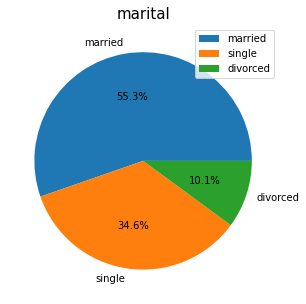

In [120]:
labels = campaign_1_success['marital'].value_counts().index
sizes = campaign_1_success['marital'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('marital',fontsize = 15)
plt.legend()

inference:

for campaign 1 success, married jobs are in top 

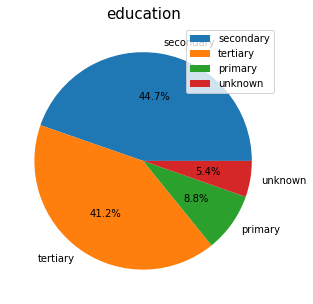

In [121]:
labels = campaign_1_success['education'].value_counts().index
sizes = campaign_1_success['education'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('education',fontsize = 15)
plt.legend()

inference:

for campaign 1 success, secondary and tertiary education are top 

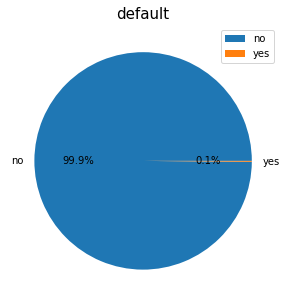

In [122]:
labels = campaign_1_success['default'].value_counts().index
sizes = campaign_1_success['default'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('default',fontsize = 15)
plt.legend()

inference:

for campaign 1 success, no default credit 99.9% means is large

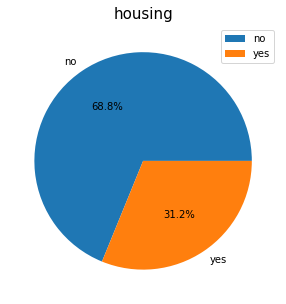

In [123]:
labels = campaign_1_success['housing'].value_counts().index
sizes = campaign_1_success['housing'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('housing',fontsize = 15)
plt.legend()

inference:

for campaign 1 success, no housing loan  percentage is large 

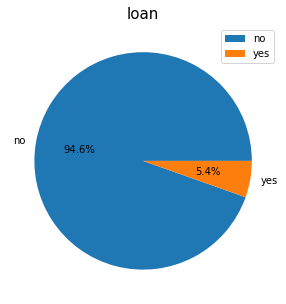

In [124]:
labels = campaign_1_success['loan'].value_counts().index
sizes = campaign_1_success['loan'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('loan',fontsize = 15)
plt.legend()

inference:

for campaign 1 success, no personal loan  percentage is large

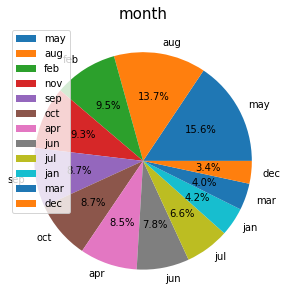

In [125]:
labels = campaign_1_success['month'].value_counts().index
sizes = campaign_1_success['month'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('month',fontsize = 15)
plt.legend()

inference:

for campaign 1 success, may and august month contact  is large

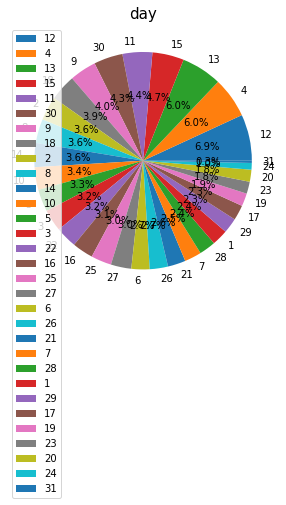

In [126]:
labels = campaign_1_success['day'].value_counts().index
sizes = campaign_1_success['day'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('day',fontsize = 15)
plt.legend()

inference:

for campaign 1 success, customer contacted in 12th and 4th in lagely 

#### campaign_2_response pie plots

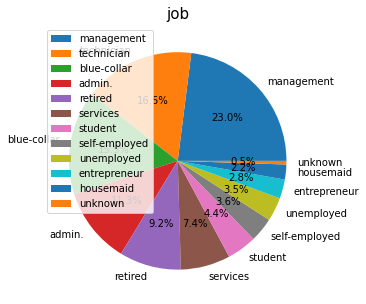

In [127]:
labels = campaign_2_response['job'].value_counts().index
sizes = campaign_2_response['job'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('job',fontsize = 15)
plt.legend()

inference:

for campaign 2 response, management , technician are in top

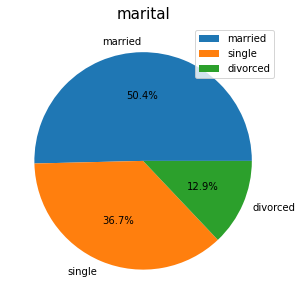

In [128]:
labels = campaign_2_response['marital'].value_counts().index
sizes = campaign_2_response['marital'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('marital',fontsize = 15)
plt.legend()

inference:

for campaign 2 response, married respond more

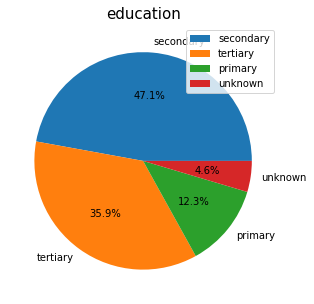

In [129]:
labels = campaign_2_response['education'].value_counts().index
sizes = campaign_2_response['education'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('education',fontsize = 15)
plt.legend()

inference:

for campaign 2 response, secondary education are in large amount

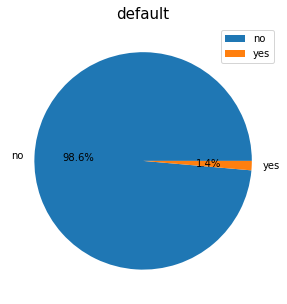

In [130]:
labels = campaign_2_response['default'].value_counts().index
sizes = campaign_2_response['default'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('default',fontsize = 15)
plt.legend()

inference:

for campaign 2 response, no default credit  is 98.6%

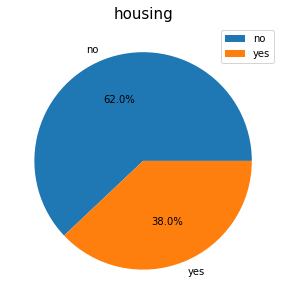

In [131]:
labels = campaign_2_response['housing'].value_counts().index
sizes = campaign_2_response['housing'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('housing',fontsize = 15)
plt.legend()

inference:

for campaign 2 response,  no housing loan large quantity

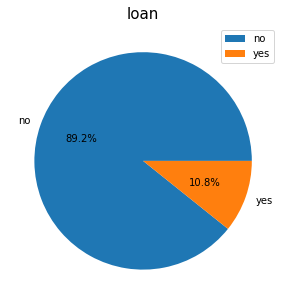

In [132]:
labels = campaign_2_response['loan'].value_counts().index
sizes = campaign_2_response['loan'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('loan',fontsize = 15)
plt.legend()

inference:

for campaign 2 response, no personal loan  is higher

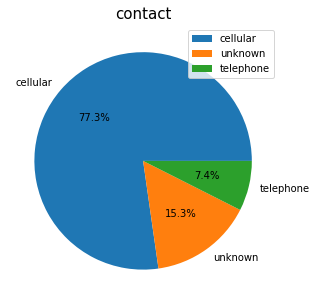

In [133]:
labels = campaign_2_response['contact'].value_counts().index
sizes = campaign_2_response['contact'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('contact',fontsize = 15)
plt.legend()

inference:

for campaign 2 response, cellular communication is maximum

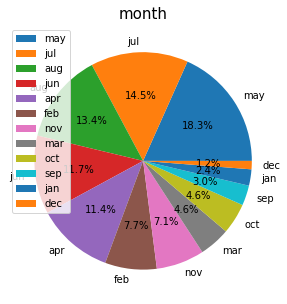

In [134]:
labels = campaign_2_response['month'].value_counts().index
sizes = campaign_2_response['month'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('month',fontsize = 15)
plt.legend()

inference:

for campaign 2 response, may , jul aug large response

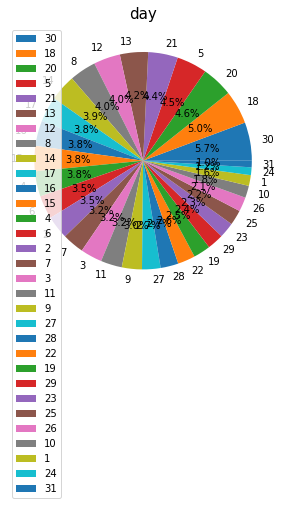

In [135]:
labels = campaign_2_response['day'].value_counts().index
sizes = campaign_2_response['day'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('day',fontsize = 15)
plt.legend()

inference:

for campaign 2 response,  30, 18, 20, 5 th days respond largely

###  campaign_1_failure and campaign_2_no_response

####  campaign_1_failure  pie plots 

In [136]:
campaign_1_failure = campaign_1[campaign_1.poutcome =='failure']# giving campaign 1 failure with help of poutcome variable
campaign_2_no_response = campaign_2[campaign_2.y=='no']# giving campaign 2  no response with help of y variable

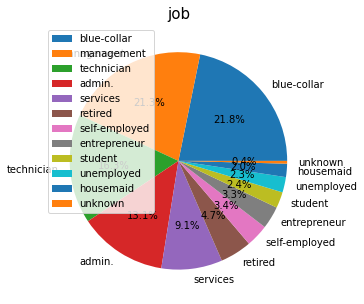

In [137]:
labels = campaign_1_failure['job'].value_counts().index
sizes = campaign_1_failure['job'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('job',fontsize = 15)
plt.legend()

inference:

for campaign 1 failure, blue collar , management  values are large

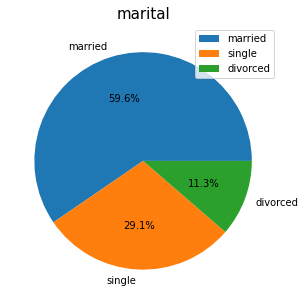

In [138]:
labels = campaign_1_failure['marital'].value_counts().index
sizes = campaign_1_failure['marital'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('marital',fontsize = 15)
plt.legend()

inference:

for campaign 1 failure, married values are large

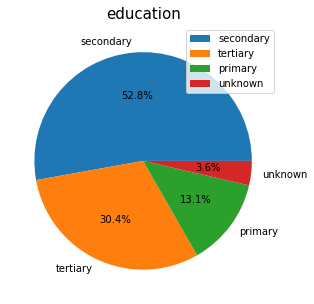

In [139]:
labels = campaign_1_failure['education'].value_counts().index
sizes = campaign_1_failure['education'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('education',fontsize = 15)
plt.legend()

inference:

for campaign 1 failure, secondary education values are large

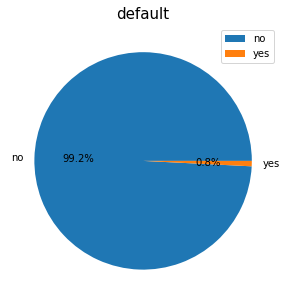

In [140]:
labels = campaign_1_failure['default'].value_counts().index
sizes = campaign_1_failure['default'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('default',fontsize = 15)
plt.legend()

inference:

for campaign 1 failure, no default credits  values are large i.e 99.2%

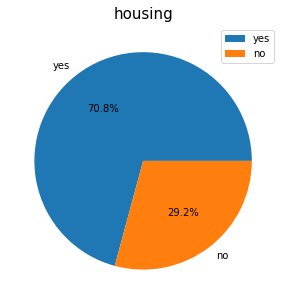

In [141]:
labels = campaign_1_failure['housing'].value_counts().index
sizes = campaign_1_failure['housing'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('housing',fontsize = 15)
plt.legend()

inference:

for campaign 1 failure, housing loan percentage is large(yes)

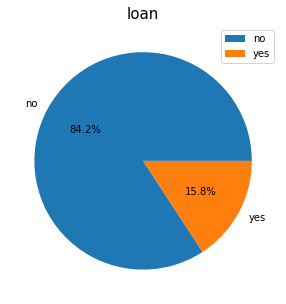

In [142]:
labels = campaign_1_failure['loan'].value_counts().index
sizes = campaign_1_failure['loan'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('loan',fontsize = 15)
plt.legend()

inference:

for campaign 1 failure, no personal loan values are large

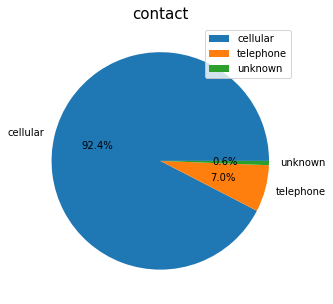

In [143]:
labels = campaign_1_failure['contact'].value_counts().index
sizes = campaign_1_failure['contact'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('contact',fontsize = 15)
plt.legend()

inference:

for campaign 1 failure, cellular contact percentage is  large

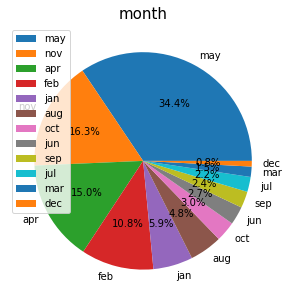

In [144]:
labels = campaign_1_failure['month'].value_counts().index
sizes = campaign_1_failure['month'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('month',fontsize = 15)
plt.legend()

inference:

for campaign 1 failure, may month percents is large

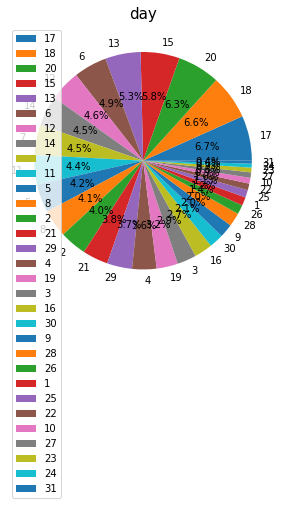

In [145]:
labels = campaign_1_failure['day'].value_counts().index
sizes = campaign_1_failure['day'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('day',fontsize = 15)
plt.legend()

inference:

for campaign 1 failure,  17th and 18th percent is large

### campaign_2_no_response  pie plots 

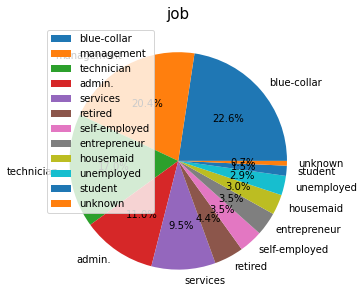

In [146]:
labels = campaign_2_no_response['job'].value_counts().index
sizes = campaign_2_no_response['job'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('job',fontsize = 15)
plt.legend()

inference:

for campaign_2_no_response, blue collar , management values are large

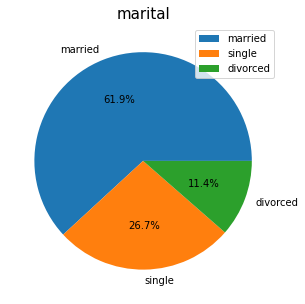

In [147]:
labels = campaign_2_no_response['marital'].value_counts().index
sizes = campaign_2_no_response['marital'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('marital',fontsize = 15)
plt.legend()

inference:

for campaign_2_no_response, married values are large

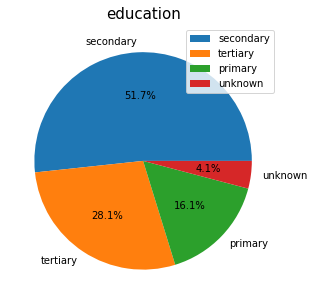

In [148]:
labels = campaign_2_no_response['education'].value_counts().index
sizes = campaign_2_no_response['education'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('education',fontsize = 15)
plt.legend()

inference:

for campaign_2_no_response, secondary education  values are large

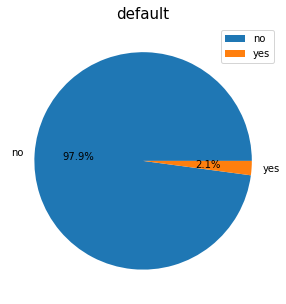

In [149]:
labels = campaign_2_no_response['default'].value_counts().index
sizes = campaign_2_no_response['default'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('default',fontsize = 15)
plt.legend()

inference:

for campaign_2_no_response, no default credit  values are large(no) i.e. 97.9

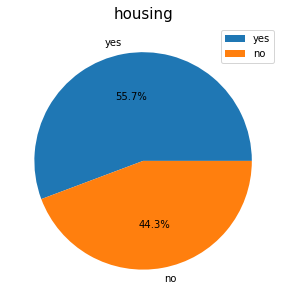

In [150]:
labels = campaign_2_no_response['housing'].value_counts().index
sizes = campaign_2_no_response['housing'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('housing',fontsize = 15)
plt.legend()

inference:

for campaign_2_no_response, housing loan job values are large(yes)

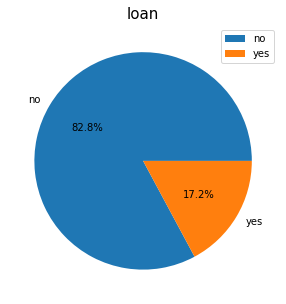

In [151]:
labels = campaign_2_no_response['loan'].value_counts().index
sizes = campaign_2_no_response['loan'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('loan',fontsize = 15)
plt.legend()

inference:

for campaign_2_no_response,  no personal loan  values are large(no)

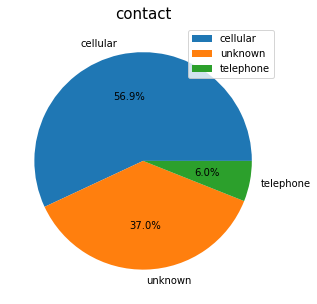

In [152]:
labels = campaign_2_no_response['contact'].value_counts().index
sizes = campaign_2_no_response['contact'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('contact',fontsize = 15)
plt.legend()

inference:

for campaign_2_no_response, cellular contacts values are large

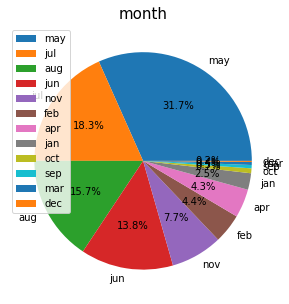

In [153]:
labels = campaign_2_no_response['month'].value_counts().index
sizes = campaign_2_no_response['month'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('month',fontsize = 15)
plt.legend()

inference:

for campaign_2_no_response, may, jul, aug  values are large

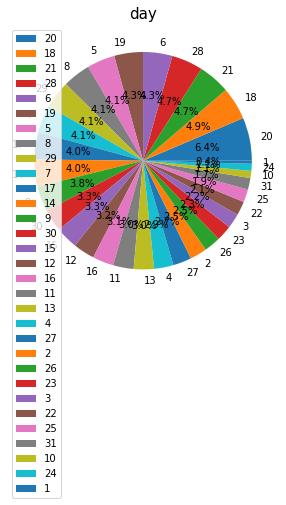

In [154]:
labels = campaign_2_no_response['day'].value_counts().index
sizes = campaign_2_no_response['day'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('day',fontsize = 15)
plt.legend()

inference:

for campaign_2_no_response, blue collar , 20,18,21,28 the days  values are large

# Result

| |campaign_1_success     | campaign_1_failure   | 
|---:|:-----------|:------|
| 1 | Professional in  management , technician admin responded positively      |management , blue collar values are large   | 
| 2 | Married jobs had responded well   |married values are large  | 
| 3 | Secondary education customers are responded good   |secondary education values are large    |
| 4 | Customers with no previous housing and personal loan gave positive response   |no default credits  values are large i.e 99.2%    | 
| 5 | Communication via cellular phone gave high rate of success    |housing loan percentage is large(yes)   | 
| 6 | Customer contacted in may month give more prone to subscribed deposits    |may month value greater    | 
| 7 | Customers contacted in 12th and 14th of month responded positively    |month of 17th and 18th month is larger     | 
| 8 | Age seems not huge influence on campaign outcome    |    | 
| 9 | Higher bank balance lead to more chance of positive outcome     |    | 
| 10 | Higher duration of calls lead to more chances of positive outcome    |   | 




| |  variables  | campaign_2_response   | campaign_2_no_response   | 
|---:|:-------------|:-----------|:------|
| 1 | job  | management , technician  are in top       |management , technician job values are large  | 
| 2 | marital  | married respond more   |married values are large  | 
| 3 | education  |  secondary education are in large amount   |secondary education values are large   |
| 4 | default  | no default credit is large   |no default credit values are large(no)   | 
| 5 | housing  | no housing loan large quantity  |housing laon job values are large(yes)   | 
| 6 | loan  |  no personal loan is higher    | no personal loan  values are large(no)    | 
| 7 | contact  | cellular communication is maximum    |cellular contacts values are large    | 
| 8 | month  | may , jul aug large response    |may, jul, aug  values are large   | 
| 9 | day  | 30, 18, 20, 5 th days respond largely   |20,18,21,28 the days  values are large   | 


Some numericals features are not normally distributed even after applying transformations. Thus we have to go for non-      parametric approach in machine learning(ML).

